To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
colors = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

Data to read

In [3]:
dataPath = '../Generator'
dataFile = 'JC-Experiments.xlsx'

To be sure that the **Experiments.xlsx** file is in the current directory, run the following block by clicking CTRL+ENTER

In [4]:
import os
print("List of files of directory:", os.path.abspath(os.getcwd()+'/'+dataPath))
os.listdir(os.getcwd()+'/'+dataPath)

List of files of directory: /home/pantale/SynologyDrive/Programming/Python/ANN-ConstitutiveLaw/Generator


['OriginalData100.svg',
 'OriginalData20.svg',
 'OriginalData300.svg',
 'OriginalData500.svg',
 'JC-Experiments.xlsx',
 'OriginalData200.svg',
 'OriginalData800.svg',
 '.ipynb_checkpoints',
 'Johnson-Cook.ipynb']

Read the content of the Excel file using the pandas library method read_excel.

In [5]:
excelData = pd.read_excel(dataPath+'/'+dataFile, None)

Extract list of temperatures from the name of sheets

In [6]:
len(excelData)
temperatures = []
temps = list(excelData.keys())
for T in temps:
    temperatures.append(int(T.replace('°C','')))
temperaturesOrig = temperatures
nTemp = len(temperatures)
nTemp, temperatures

(6, [20, 100, 200, 300, 500, 800])

Get the values of epsp

In [7]:
dataSheet = excelData[str(temperatures[0])+'°C']
epsp = []
for i in range(1, dataSheet.shape[1]):
    epsp.append(dataSheet.columns[i])
epspOrig = epsp
nEpsp = len(epsp)
nEpsp, epsp

(5, [0.1, 1, 50, 1000, 500000])

Extract data from the panda sheets

In [8]:
# Read first sheet
dataSheet = excelData[str(temperatures[0])+'°C']
data = dataSheet.values
eps = data[:,0]
sig = data[:,1:]
# Append the other sheets
for T in temperatures[1:]:
    dataSheet = excelData[str(T)+'°C']
    data = dataSheet.values
    sig = np.append(sig, data[:,1:], axis=1)
nEps = len(eps)

In [9]:
temperatures = np.array(temperatures)
epsp = np.log(np.array(epsp)/0.1)
epspArray = np.tile(epsp,temperatures.shape[0])
temperaturesArray = temperatures.repeat(epsp.shape[0])
epspArray, temperaturesArray

(array([ 0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847,
         0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847,
         0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847,
         0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847,
         0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847,
         0.        ,  2.30258509,  6.2146081 ,  9.21034037, 15.42494847]),
 array([ 20,  20,  20,  20,  20, 100, 100, 100, 100, 100, 200, 200, 200,
        200, 200, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 800,
        800, 800, 800, 800]))

In [10]:
entries = np.empty([epspArray.shape[0]*eps.shape[0], 4])
row = 0
colEps = 0
colEpsp = 1
colT = 2
colSig = 3
for i in range(epspArray.shape[0]):
    for j in range(eps.shape[0]):
        entries[row, colEps] = eps[j]
        entries[row, colEpsp] = epspArray[i]
        entries[row, colT] = temperaturesArray[i]
        entries[row, colSig] = sig[j,i]
        row += 1
entries

array([[0.00000000e+00, 0.00000000e+00, 2.00000000e+01, 8.06000000e+02],
       [2.04081633e-02, 0.00000000e+00, 2.00000000e+01, 1.12531214e+03],
       [4.08163265e-02, 0.00000000e+00, 2.00000000e+01, 1.16474716e+03],
       ...,
       [9.59183673e-01, 1.54249485e+01, 8.00000000e+02, 8.37173720e+02],
       [9.79591837e-01, 1.54249485e+01, 8.00000000e+02, 8.38451238e+02],
       [1.00000000e+00, 1.54249485e+01, 8.00000000e+02, 8.39706802e+02]])

In [11]:
maxEntries = entries.max(axis=0)

In [12]:
NNentries = entries / np.array(maxEntries)
NNentries

array([[0.        , 0.        , 0.025     , 0.4990896 ],
       [0.02040816, 0.        , 0.025     , 0.69681338],
       [0.04081633, 0.        , 0.025     , 0.72123224],
       ...,
       [0.95918367, 1.        , 1.        , 0.51839292],
       [0.97959184, 1.        , 1.        , 0.51918398],
       [1.        , 1.        , 1.        , 0.51996145]])

In [13]:
np.save('Entries.npy', entries)
np.save('NN-Entries.npy', NNentries)

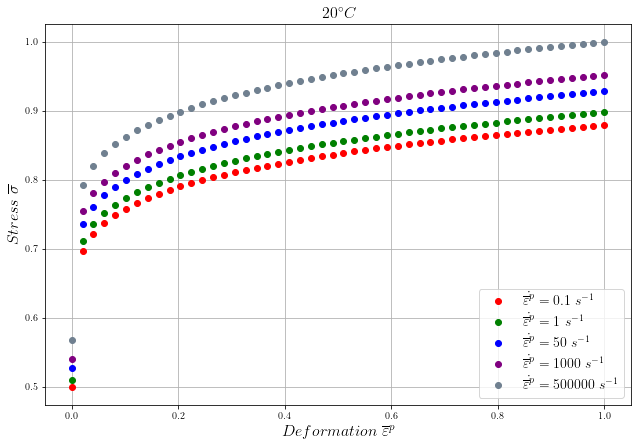

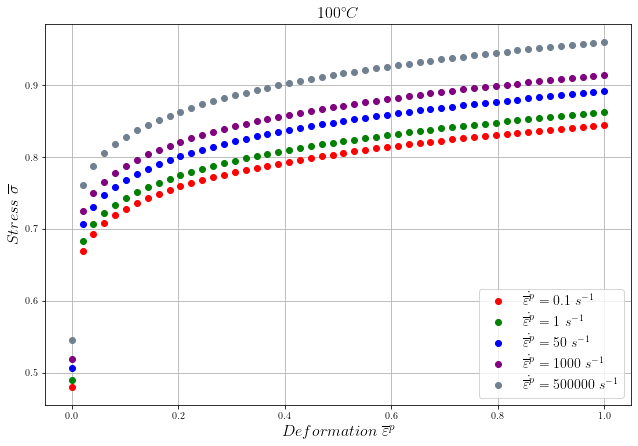

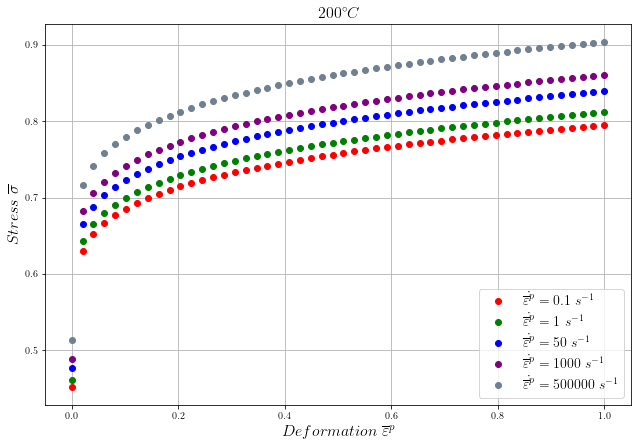

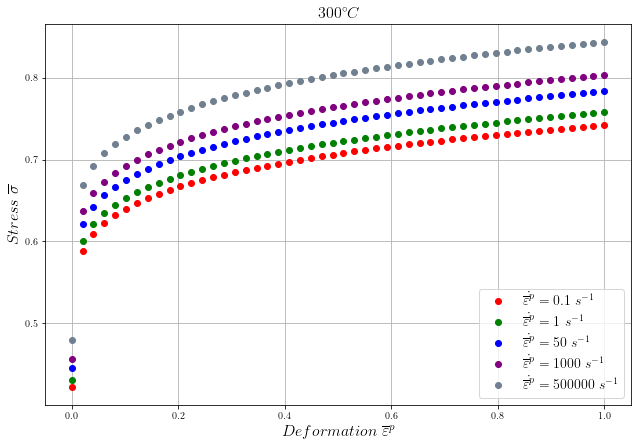

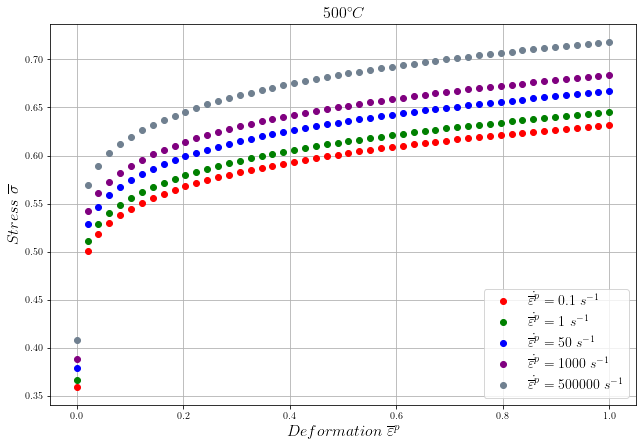

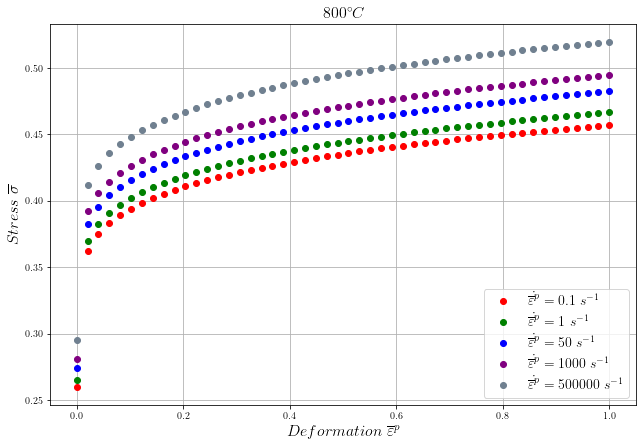

In [14]:
for T in temperatures:
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    cl = 0
    for epspv, epspvv in zip(epsp,epspOrig):
        # filter on T
        data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
        # Plot the curves
        plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvv) + '\ s^{-1}$', marker = 'o', linestyle='none')
        cl += 1
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(T) + '^{\circ}C$', fontsize = 16) # Self explicit command
    plt.savefig('OriginalData'+str(T)+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

## Mise en forme des données pour le RNN

In [15]:
NNinput = NNentries[:,colEps:colSig]
NNoutput = NNentries[:,colSig]
NNinput.shape, NNoutput.shape

((1500, 3), (1500,))

Construction du Réseau de Neurones

In [16]:
# Importation de TensorFlow 
import numpy as np
from keras.models import Sequential
from keras.metrics import MeanSquaredError
from keras.layers.core import Dense, Activation
from keras import optimizers

In [17]:
models = []
convergenceCurves = []
modelsDescription = []

In [18]:
FACT = ['relu', 'sigmoid', 'tanh']
COUCH = [3, 5, 7, 9]
for f in FACT:
    for c in COUCH:
        model=Sequential()
        model.add(Dense(c, input_dim=3, activation=f))
        model.add(Dense(1))
        models.append(model)
        modelsDescription.append("3-"+str(c)+"-1-"+f)

In [19]:
for model in models:
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [20]:
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adams', metrics=[MeanSquaredError()])

In [21]:
j = 1
iterations = 10
for model in models:
    hist = np.array([])
    print("MODEL :", modelsDescription[j-1])
    for i in range(iterations):
        history = model.fit(NNinput, NNoutput, epochs=1000, verbose=0)
        loss = history.history['loss']
        hist = np.append(hist,loss[::10])
        print("Iteration :", i+1, "/",iterations,"->",loss[-1],"         ", end='\r')
    print("\n")
    convergenceCurves.append(hist)
    j+=1

MODEL : 3-3-1 relu
Iteration : 10 / 10 -> 0.0012723217951133847          

MODEL : 3-5-1 relu
Iteration : 10 / 10 -> 0.0002600932202767581          

MODEL : 3-7-1 relu
Iteration : 10 / 10 -> 9.729266457725316e-05          

MODEL : 3-9-1 relu
Iteration : 10 / 10 -> 9.719139598018955e-06          

MODEL : 3-3-1 sigmoid
Iteration : 10 / 10 -> 8.330162381753325e-05          

MODEL : 3-5-1 sigmoid
Iteration : 10 / 10 -> 2.5200674826919567e-06          

MODEL : 3-7-1 sigmoid
Iteration : 10 / 10 -> 2.4515925360901747e-06          

MODEL : 3-9-1 sigmoid
Iteration : 10 / 10 -> 1.74008948761184e-06           

MODEL : 3-3-1 tanh
Iteration : 10 / 10 -> 8.206058555515483e-05          

MODEL : 3-5-1 tanh
Iteration : 10 / 10 -> 2.5205501970049227e-06          

MODEL : 3-7-1 tanh
Iteration : 10 / 10 -> 3.045129915335565e-06          

MODEL : 3-9-1 tanh
Iteration : 10 / 10 -> 1.4743953897777828e-06          



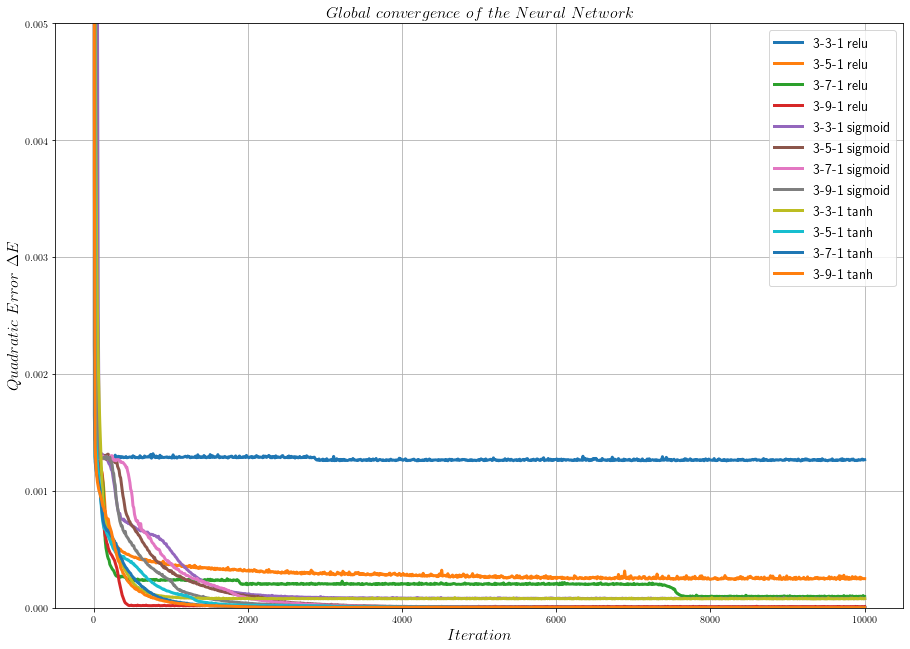

In [30]:
plt.figure(figsize = (15.2, 10.75))
plt.rc('text', usetex = True)
i=0
x = np.linspace(0,10*len(convergenceCurves[0]),len(convergenceCurves[0]))
for model in models:
    plt.plot(x, convergenceCurves[i], label=modelsDescription[i], linewidth=3)
    i+=1
#    plt.plot(hist, color = 'purple', linewidth=3)
plt.grid() # Plot the grid with default size
plt.xlabel(r'$Iteration$', fontsize = 16) # Labels the x axis
plt.ylim(0, 5e-3)
plt.ylabel(r'$Quadratic\ Error\ \Delta E$', fontsize = 16) # Labels the y axis
plt.title(r'$Global\ convergence\ of\ the\ Neural\ Network$', fontsize = 16) # Self explicit command
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 14)
plt.savefig('Convergence.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

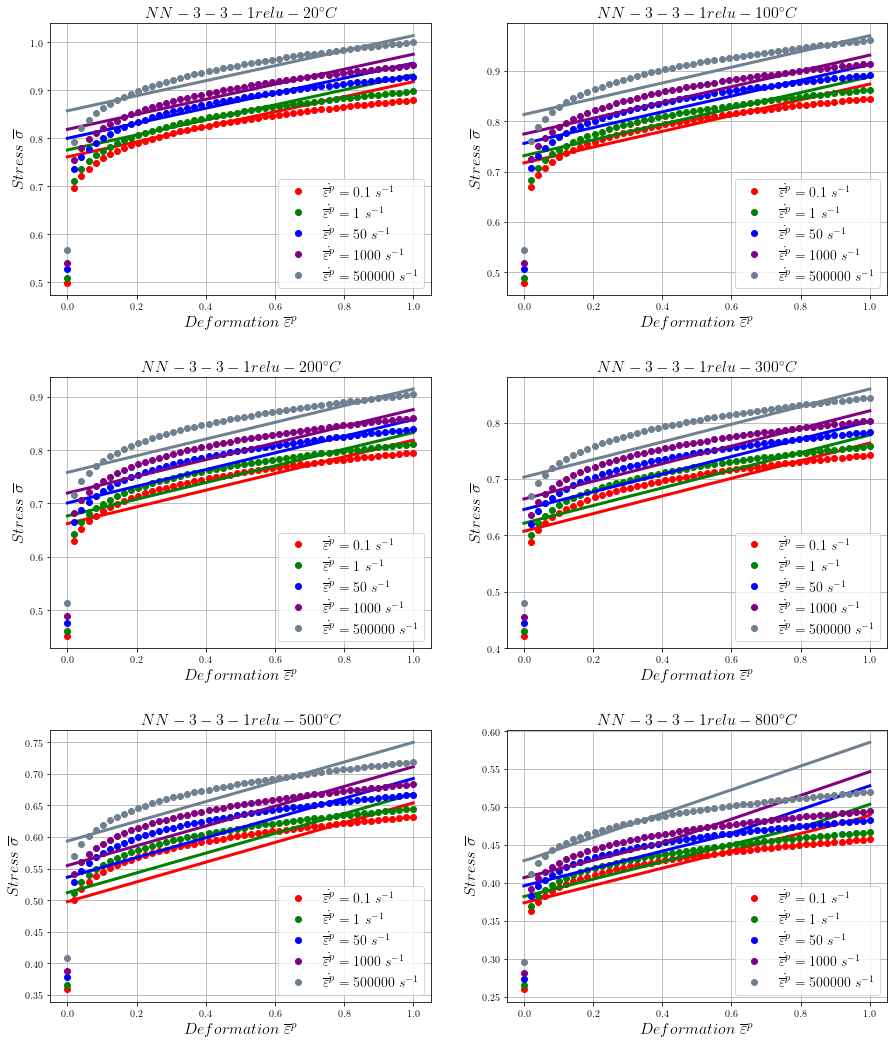

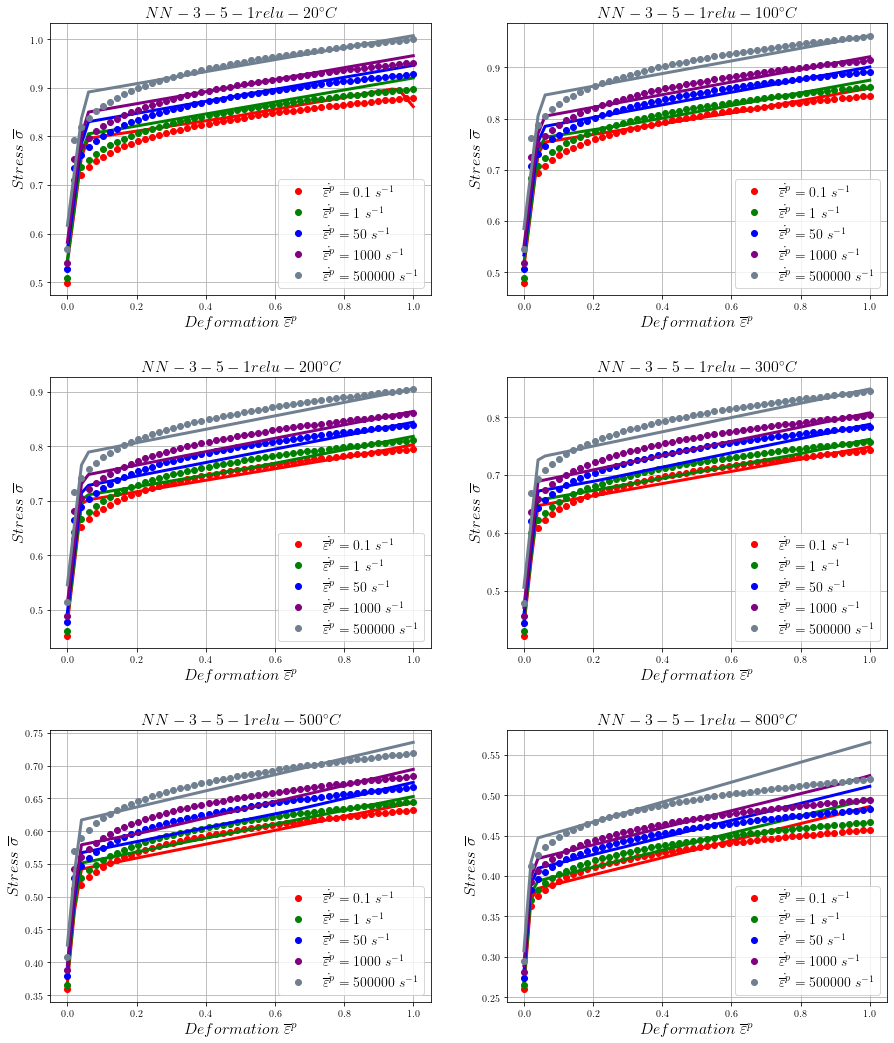

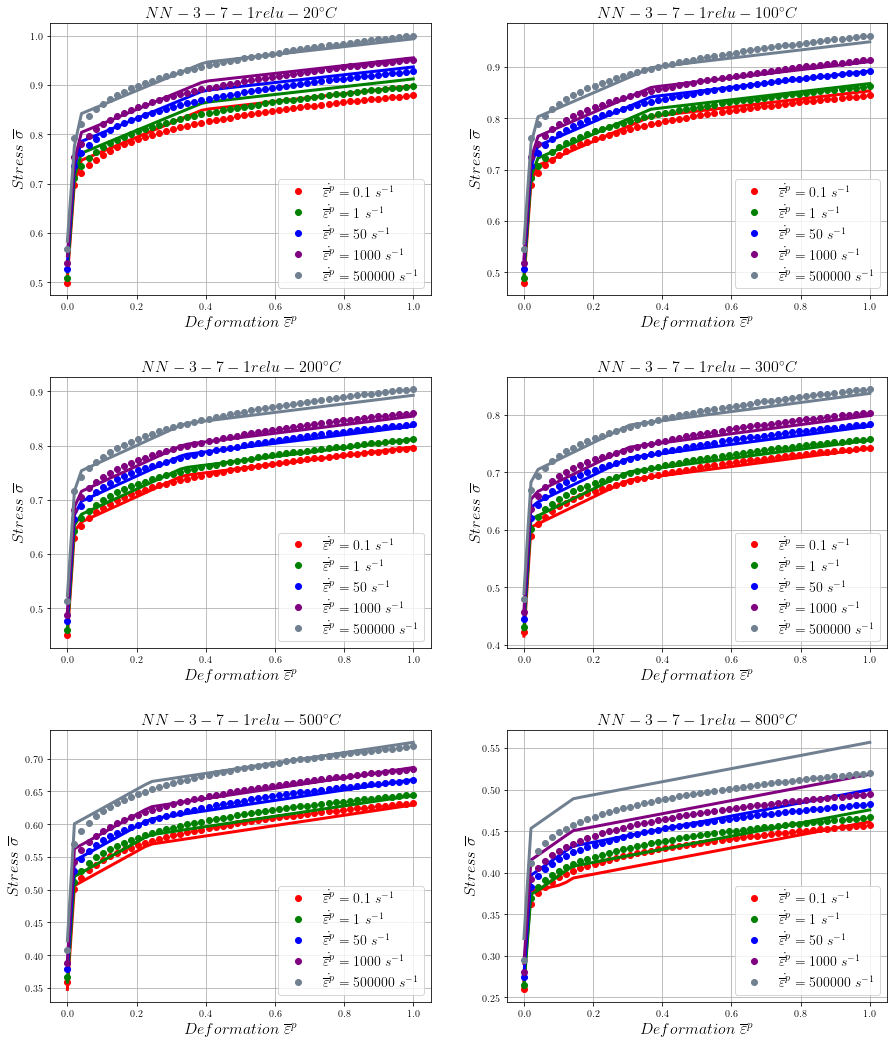

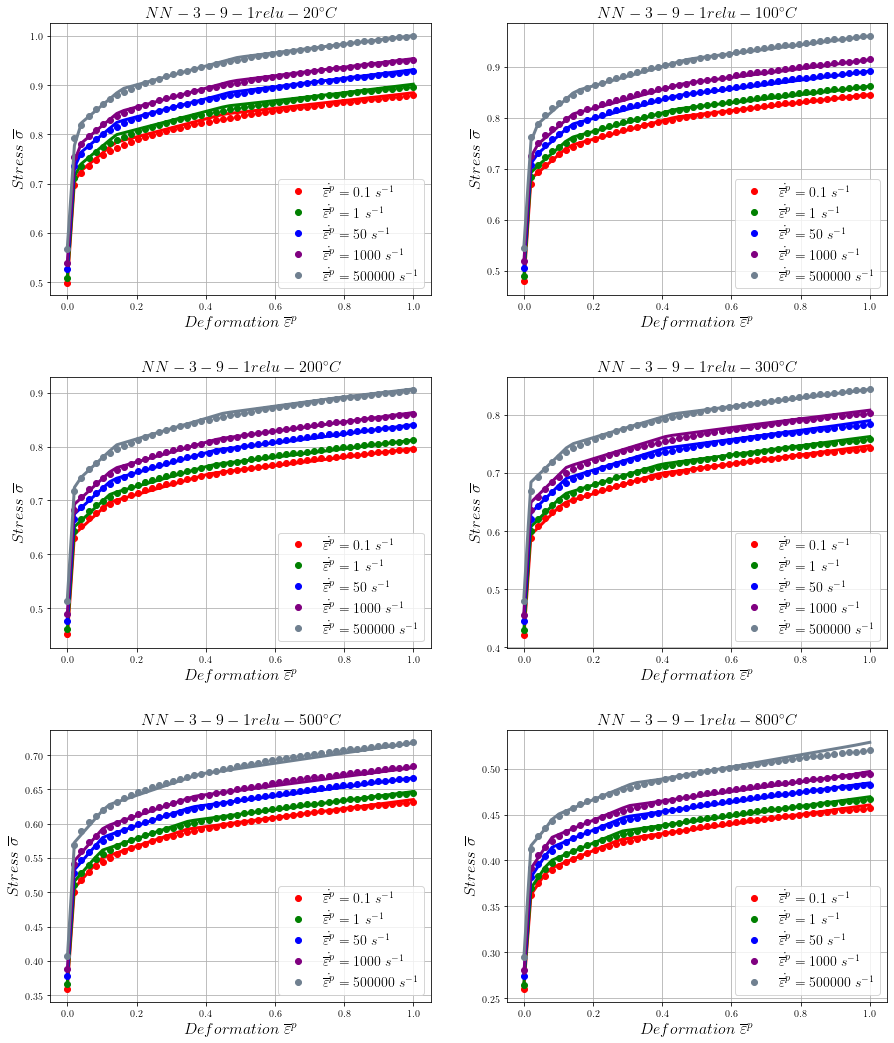

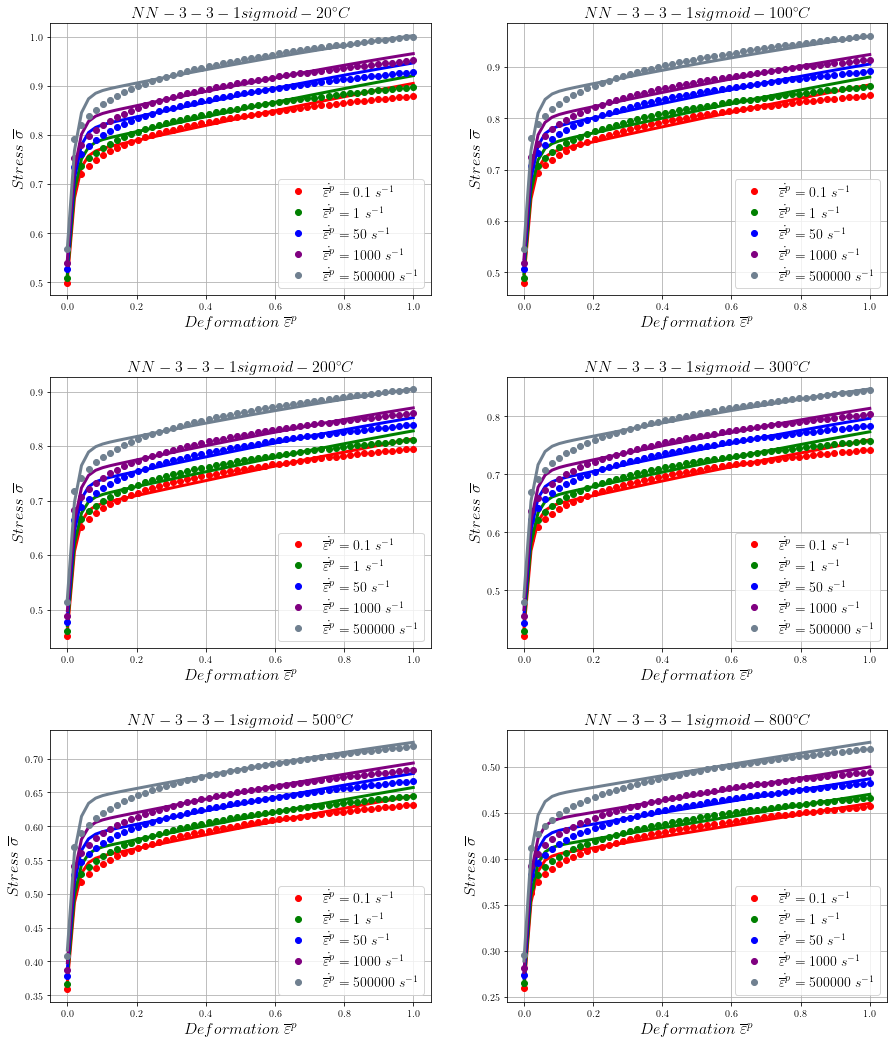

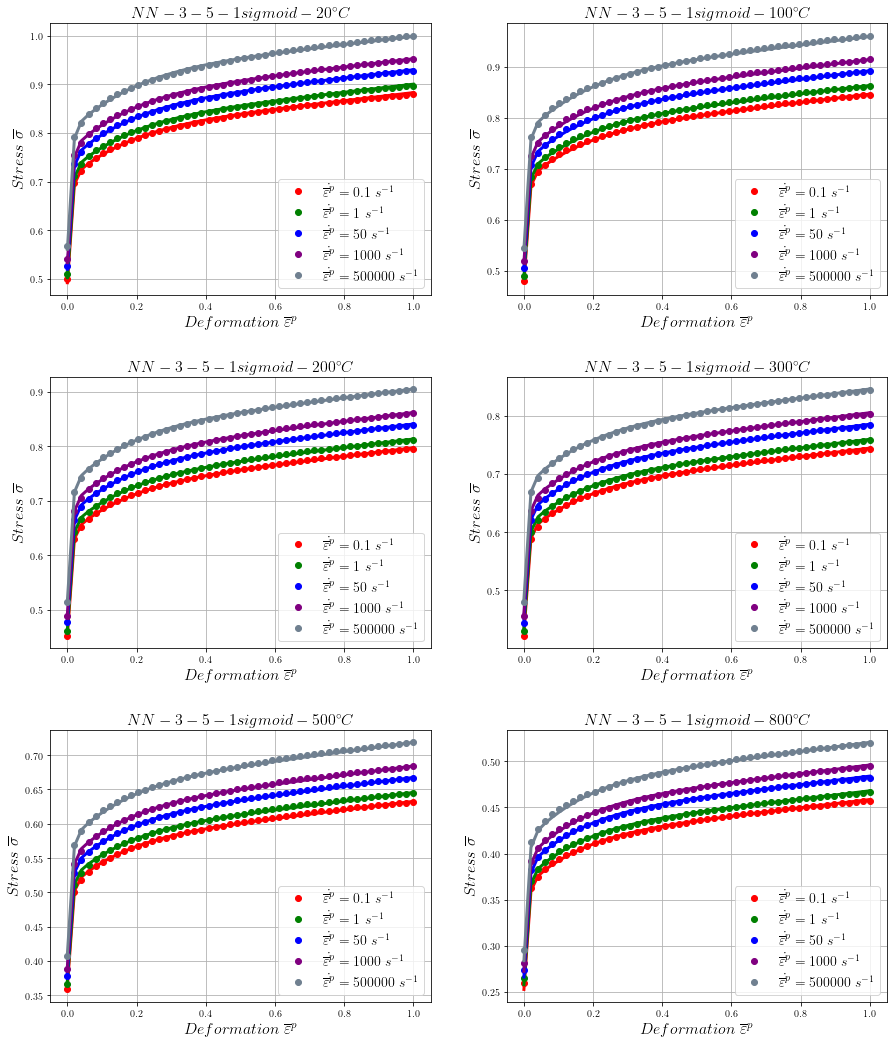

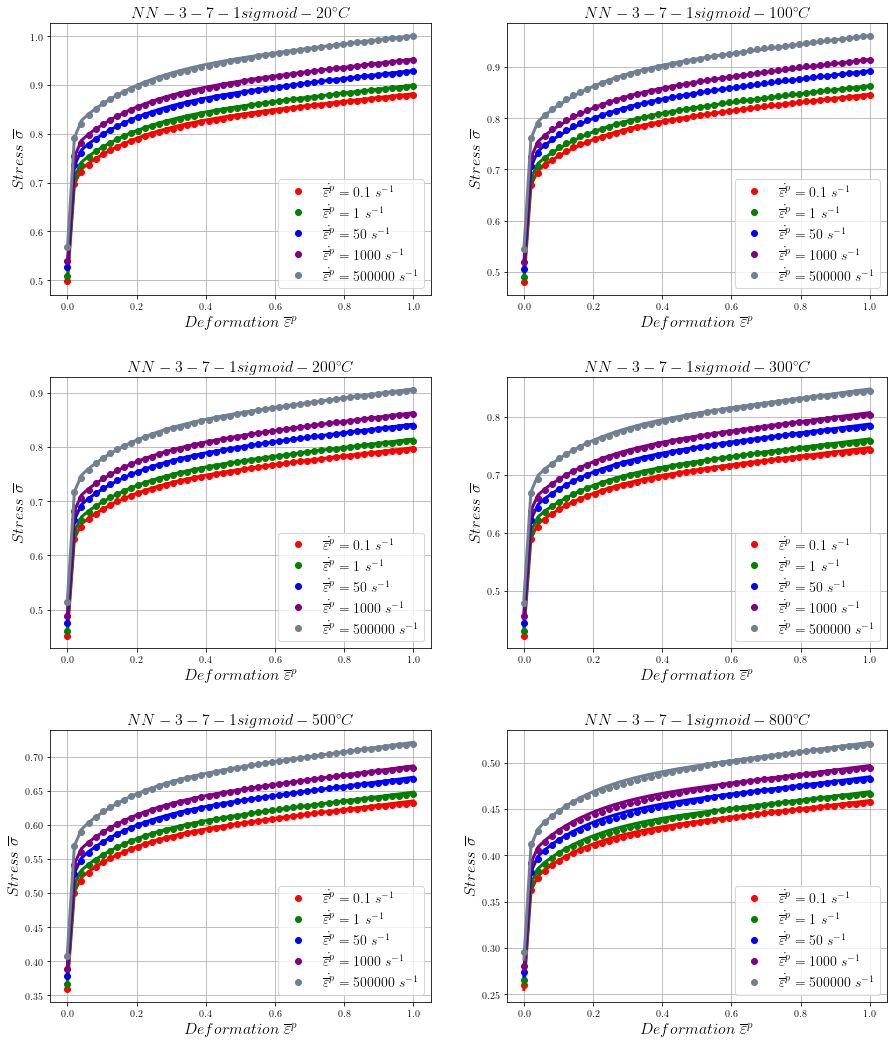

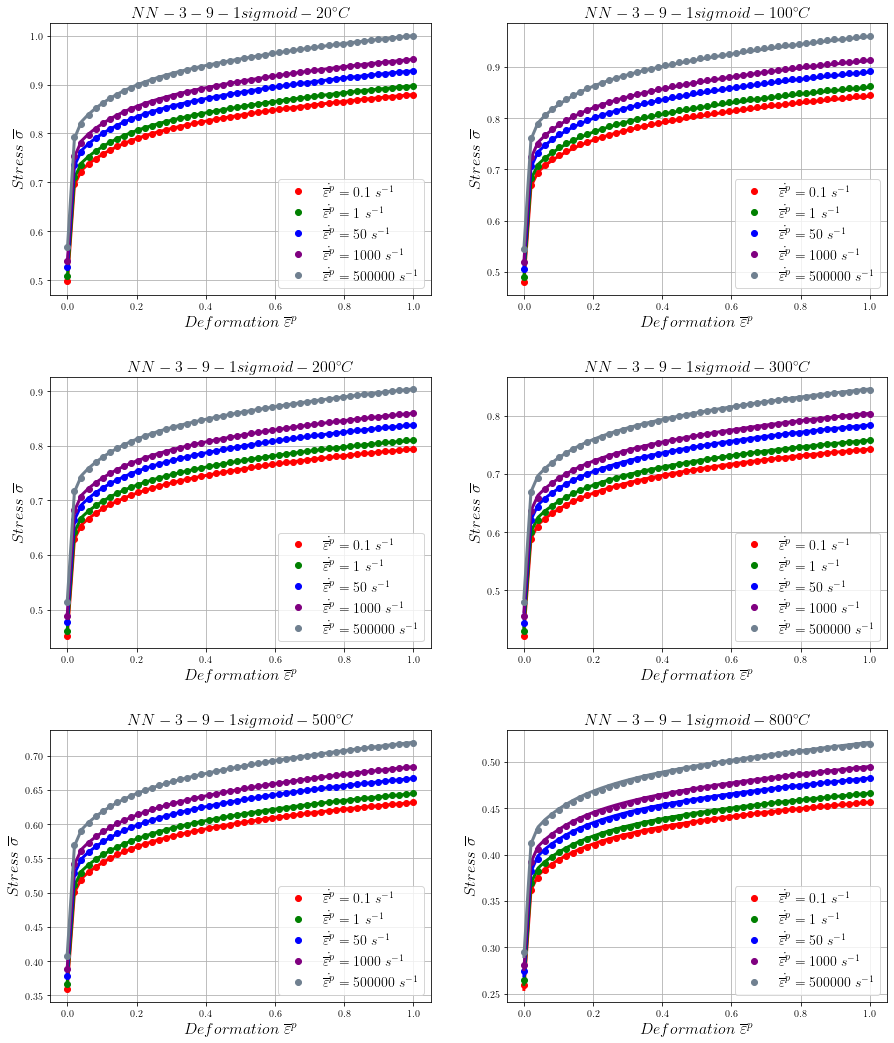

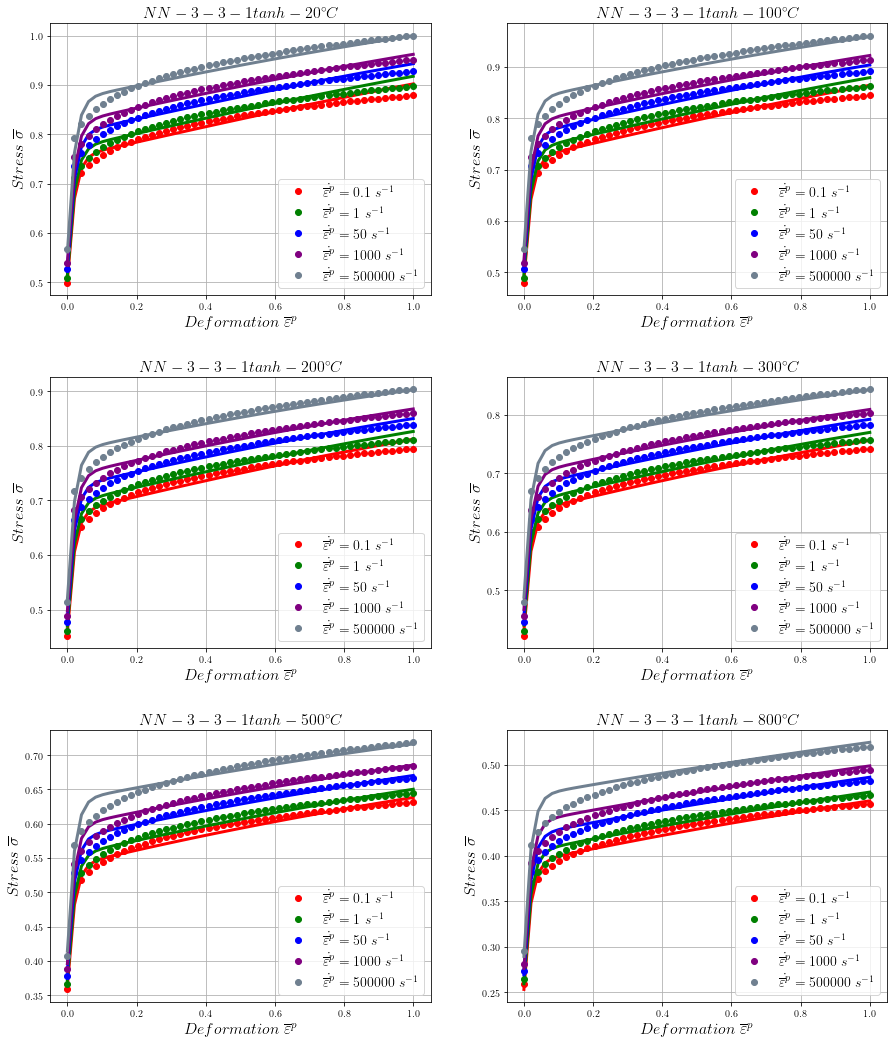

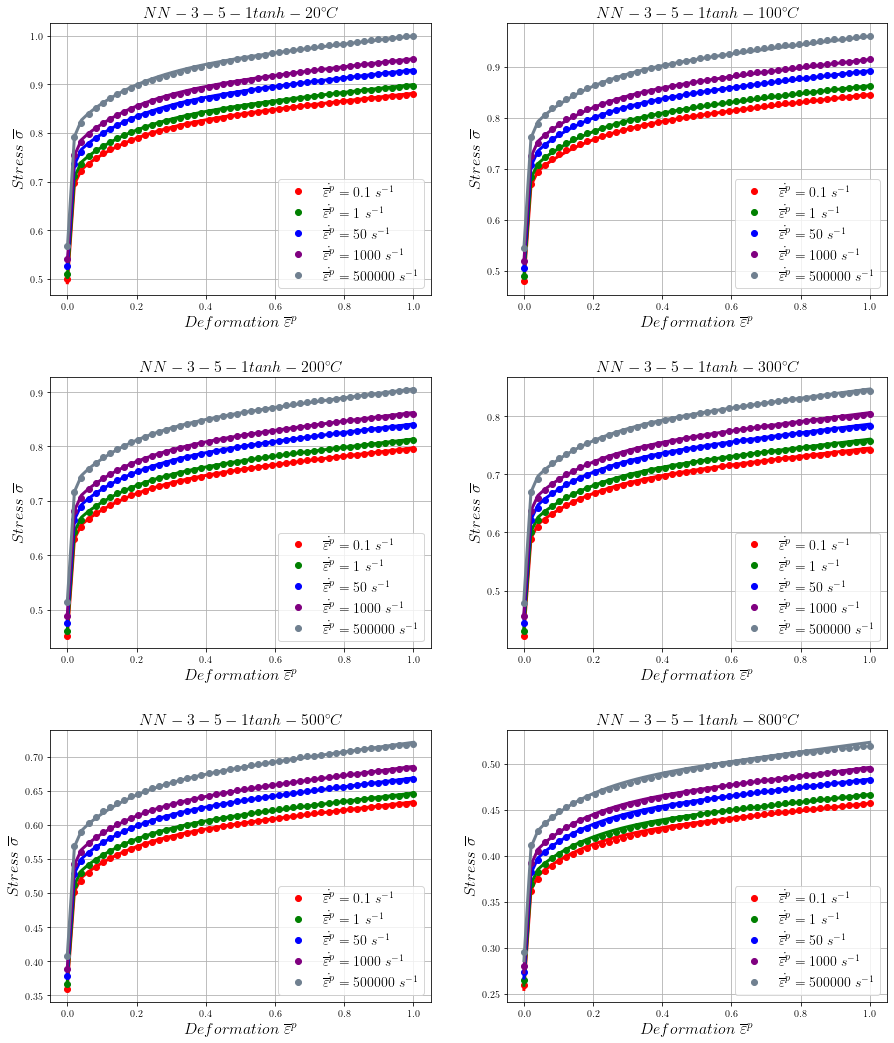

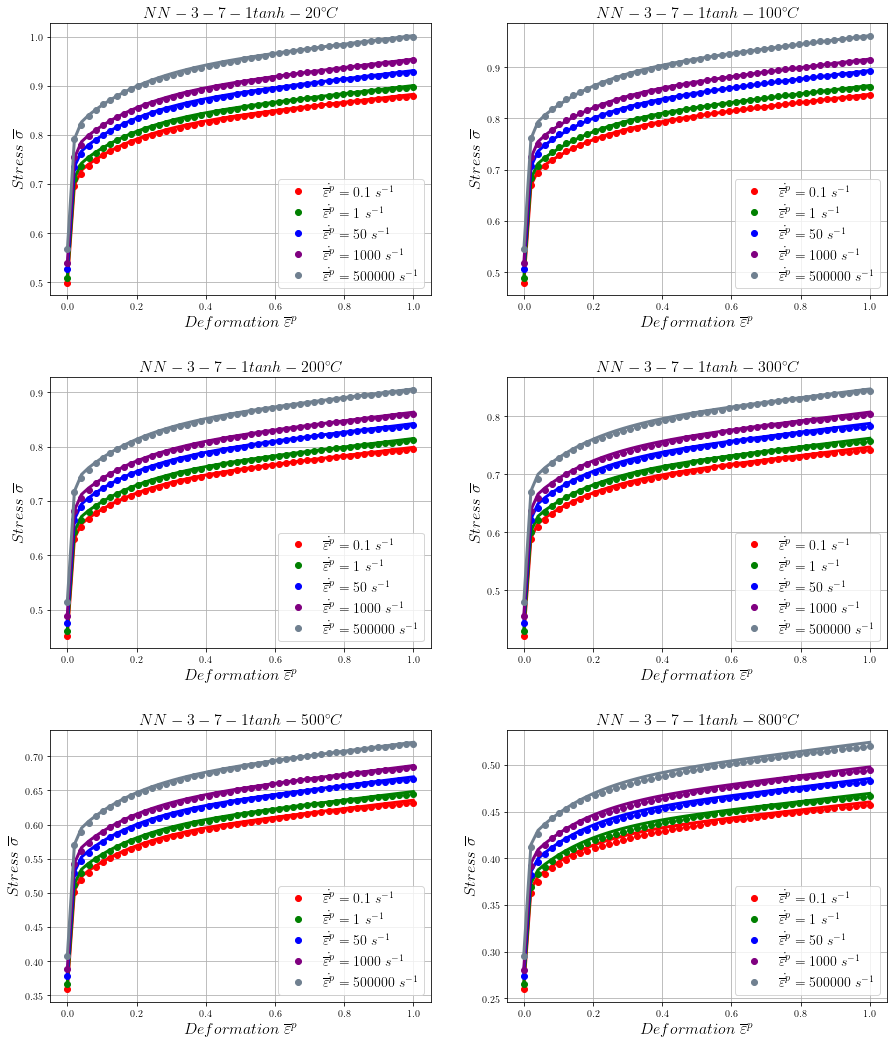

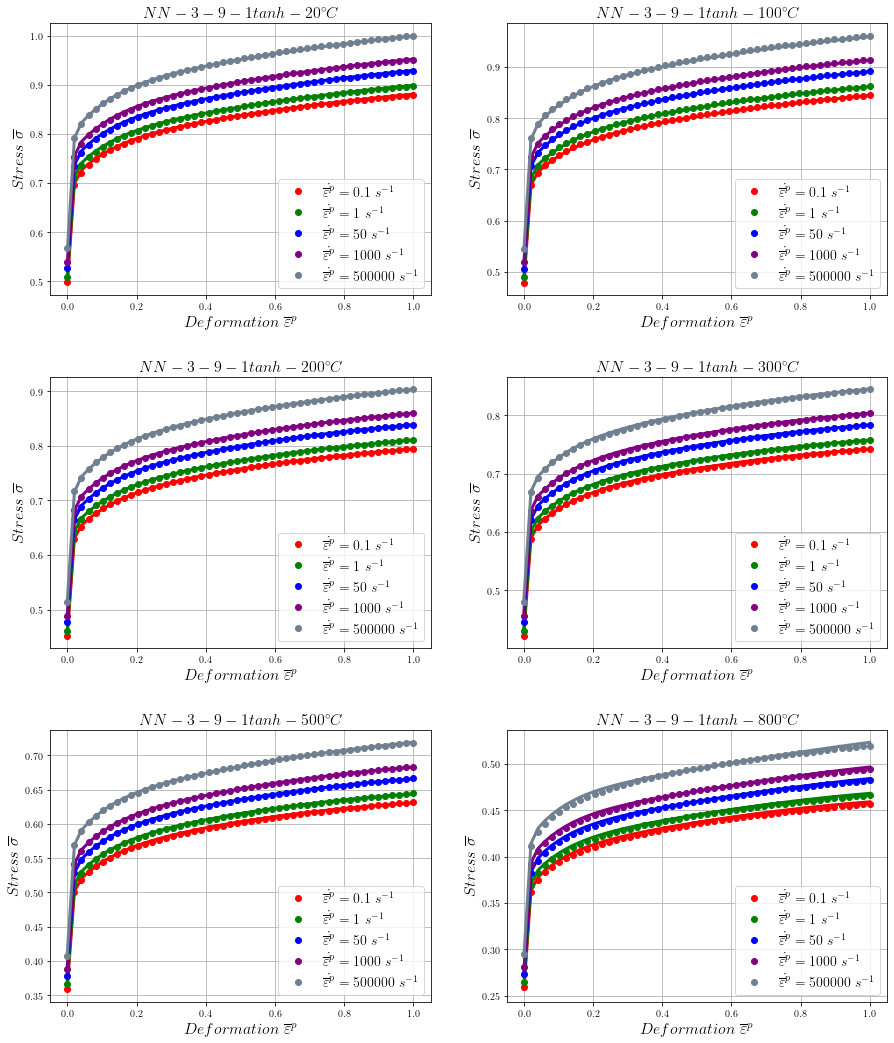

In [23]:
i=0
for model in models:
    predictedOutput = model.predict(NNinput)
    plotPredicted=predictedOutput.reshape(nEpsp*nTemp, nEps).T
    plotPredicted
    pcol = 0
    plt.figure(figsize = (15, 18))
    plt.rc('text', usetex = True)
    idx = 1
    plt.subplots_adjust(hspace = 0.3)
    for T, TOrig in zip(temperatures, temperaturesOrig):
        cl = 0
        plt.subplot(3, 2, idx)
        for epspv, epspvAff in zip(epsp, epspOrig):
            # filter on T
            data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
            # Plot the curves
            plt.plot(data[:,colEps], data[:,colSig], colors[cl], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvAff) + '\ s^{-1}$', marker = 'o', linestyle='none')
            plt.plot(data[:,colEps], plotPredicted[:,pcol], colors[cl], linewidth = 3)
            cl += 1
            pcol += 1
        plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
        plt.grid() # Plot the grid with default size
        plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
        plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
        plt.title(r'$NN-'+modelsDescription[i] +'-'+ str(T) + '^{\circ}C$', fontsize = 16) # Self explicit command
        idx += 1
    plt.savefig('NN-'+modelsDescription[i]+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    i+=1

In [24]:
for model, modName in zip(models, modelsDescription):
    model.save_weights(modName)

In [48]:
modelsDescription[12]='3-9-1-tanh'

IndexError: list assignment index out of range

In [41]:
modelsDescription

['3-3-1-relu',
 '3-5-1-relu',
 '3-7-1-relu',
 '3-9-1-relu',
 '3-3-1-sigmoid',
 '3-5-1-sigmoid',
 '3-7-1 sigmoid',
 '3-9-1 sigmoid',
 '3-3-1 tanh',
 '3-5-1 tanh',
 '3-7-1 tanh',
 '3-9-1 tanh']